# PreProcessing Demonstration

In this notebook, we will explore the PyTorch Dataset class and show how it can be used to handle input images. It should do some light preprocessing to make sure everything is available. 

Some things to note:
* checks to see that there is a 1-to-1 correspondence between the datasets
* does the tiling
* exports tiles that are extra

In [1]:
# Helpful trick for loading the directories correction
import sys, os
from pyprojroot import here
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
sys.path.append(str(here()))


from src.data.worldfloods.dataset import WorldFloodsDataset
from rasterio.plot import show as rasterio_show

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)

%load_ext autoreload
%autoreload 2

## Load Demo Image

For this demonstration, we need a S2 AND a groundtruth image. We have two that we can download.

In [3]:
from src.data.worldfloods.test_download import download_demo_image

In [6]:
from pathlib import Path
destination_dir = Path(root).joinpath("datasets/demo_images")

In [8]:
download_demo_image(dest_dir=destination_dir)

Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/S2' Is Already There.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/gt' Is Already There.


In [10]:
!ls $destination_dir/S2

01042016_Holmes_Creek_at_Vernon_FL.tif


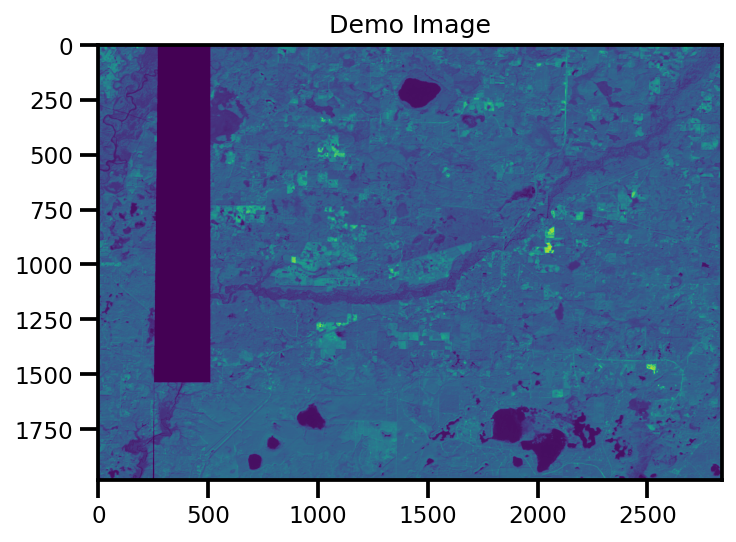

In [36]:
import rasterio

file_name = Path(destination_dir).joinpath("S2/01042016_Holmes_Creek_at_Vernon_FL.tif")

with rasterio.open(file_name, "r") as f:
    
    fig, ax = plt.subplots()
    pl = rasterio_show(f.read(6), ax=ax, cmap='viridis')
    ax.set_title("Demo Image")
    plt.show()
    

## Outline the Immediate Steps

* check for file correspondence between the directories

## Initialize PyTorch Dataset

In [13]:


image_files = [
    str(file_name),
]

train_dataset = WorldFloodsDataset(
    image_files=image_files, image_prefix="S2", gt_prefix="gt"
)
type(train_dataset)

src.data.worldfloods.dataset.WorldFloodsDataset

In [15]:
demo_image = train_dataset[0]
demo_image["image"].shape

/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/S2/01042016_Holmes_Creek_at_Vernon_FL.tif


(13, 1980, 2841)

### Visualize Image

We can use the tried and true rasterio.

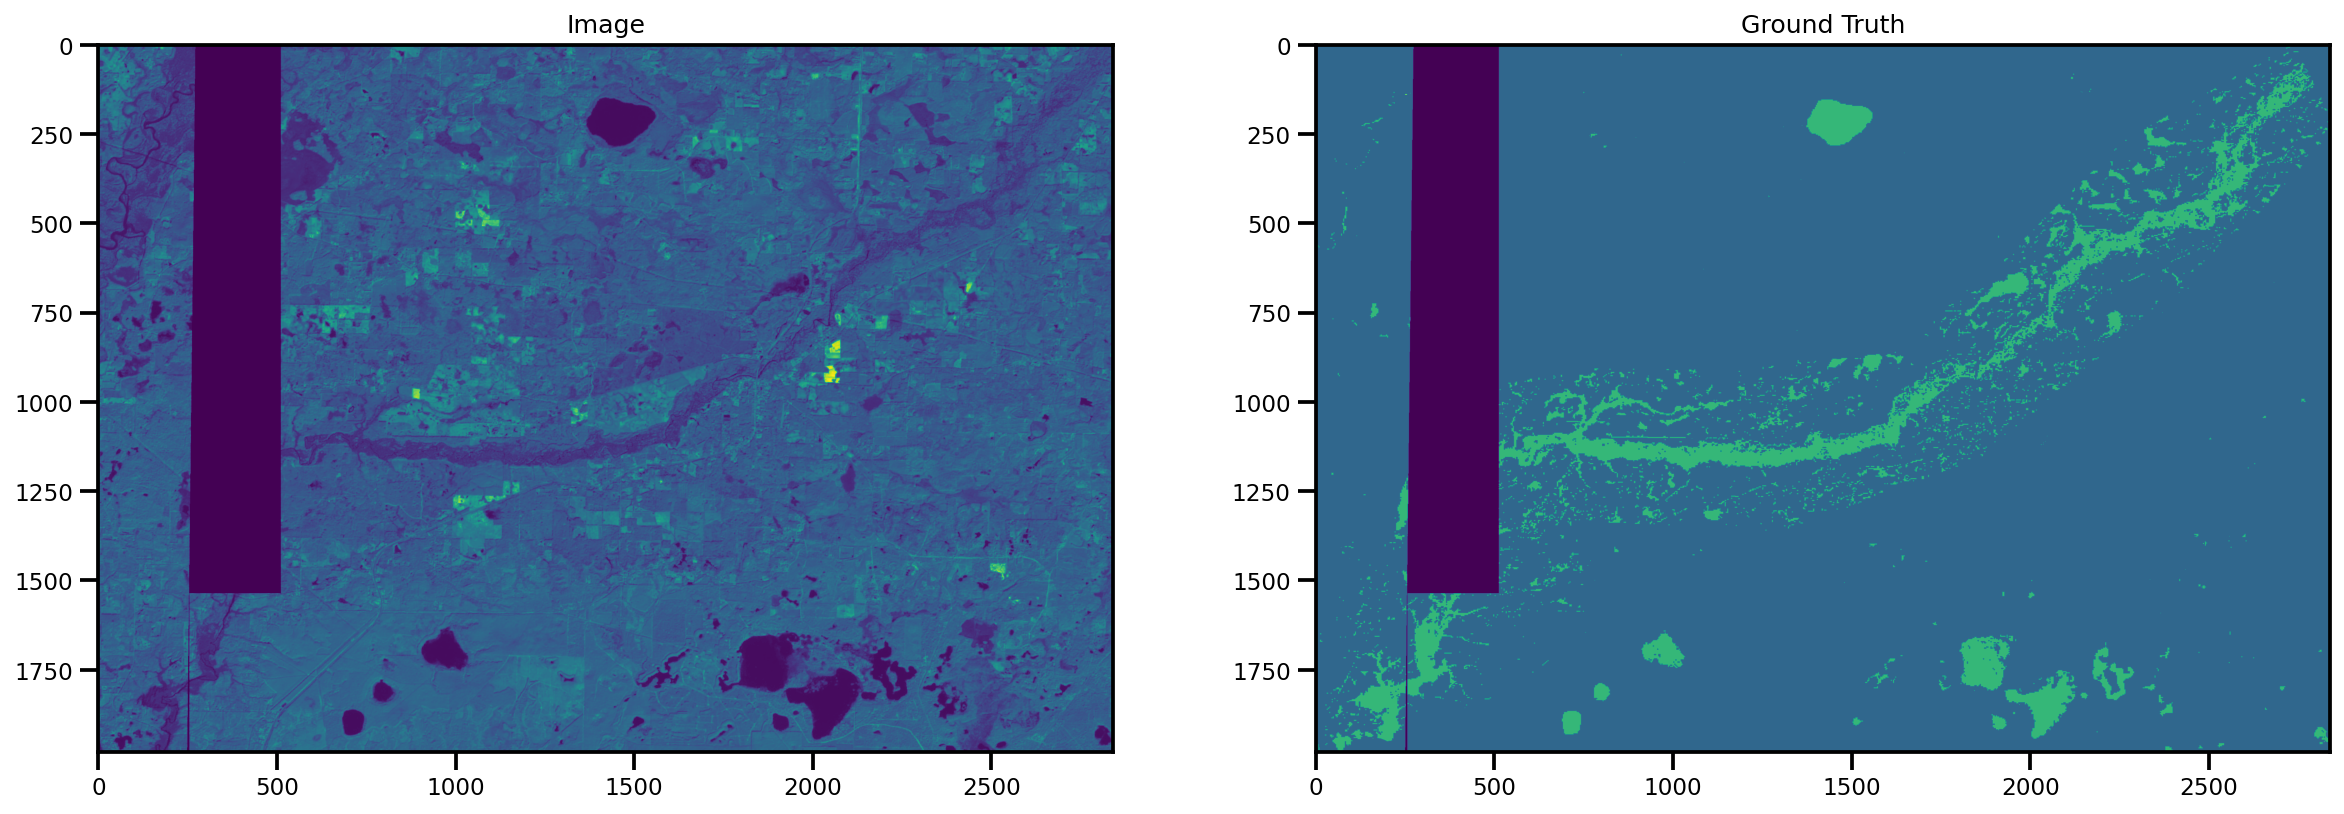

In [19]:
from rasterio.plot import show as rasterio_show

band = 6 # it shows better land features

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
rasterio_show(demo_image["image"][6, :, :], ax=ax[0])
ax[0].set_title("Image")

rasterio_show(demo_image["mask"][:, :, :], ax=ax[1])
ax[1].set_title("Ground Truth")
    
plt.show()

## Tiling

For ML, often we want to use a subset of the original image, aka tiles. For our purposes, we're going to be tiling indiscriminantly, i.e. we are not concerned about geocoordinates. All we care about is that the windowsize is smaller then the images.

In [38]:
from src.data.worldfloods.dataset import WorldFloodsDatasetTiled

# destination_dir = Path(root).joinpath("datasets/trials/image/gt/")

# image_files = [
#     str(Path(root).joinpath(destination_dir).joinpath("01042016_Holmes_Creek_at_Vernon_FL.tif")),
# #     str(Path(root).joinpath(destination_dir).joinpath("01042016_Holmes_Creek_at_Vernon_FL.tif")),
# ]

train_dataset_tilded = WorldFloodsDatasetTiled(
    image_files=image_files, image_prefix="S2", gt_prefix="gt", window_size=(128, 128)
)
type(train_dataset_tilded)

src.data.worldfloods.dataset.WorldFloodsDatasetTiled

In [46]:
demo_image = train_dataset_tilded[10]


print(f"Shape: {demo_image['image'].shape}")
print(f"Len: {len(train_dataset)}")

Shape: (13, 128, 128)
Len: 1


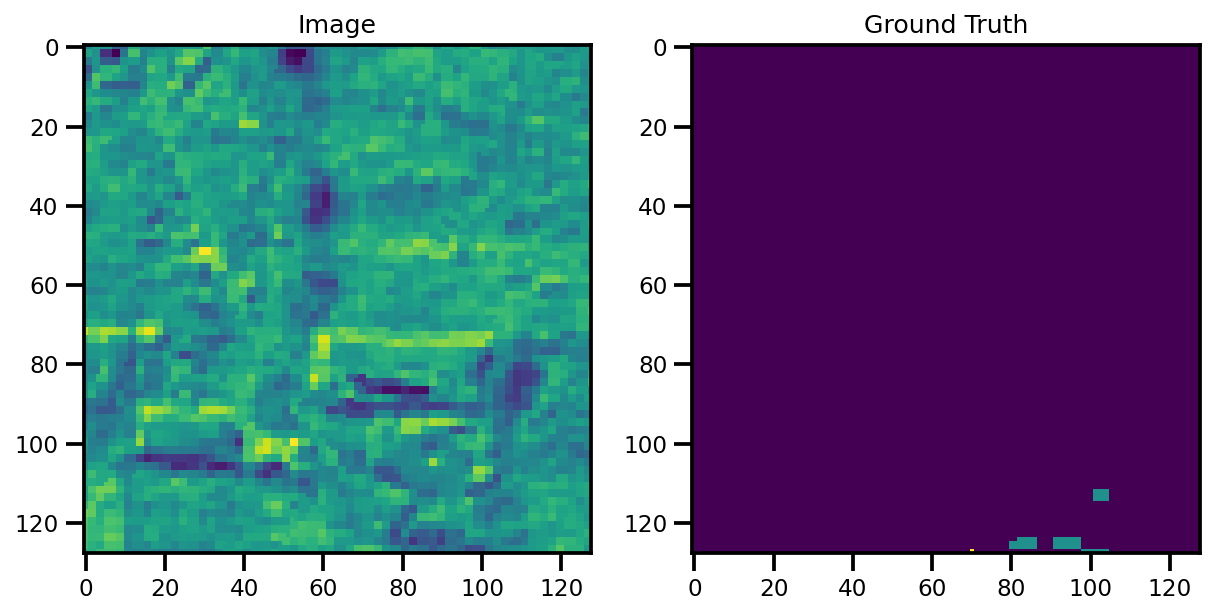

In [47]:
from rasterio.plot import show as rasterio_show

band = 6 # it shows better land features

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
rasterio_show(demo_image["image"][6, :, :], ax=ax[0])
ax[0].set_title("Image")

rasterio_show(demo_image["mask"][:, :, :], ax=ax[1])
ax[1].set_title("Ground Truth")
    
plt.show()

### Tiles

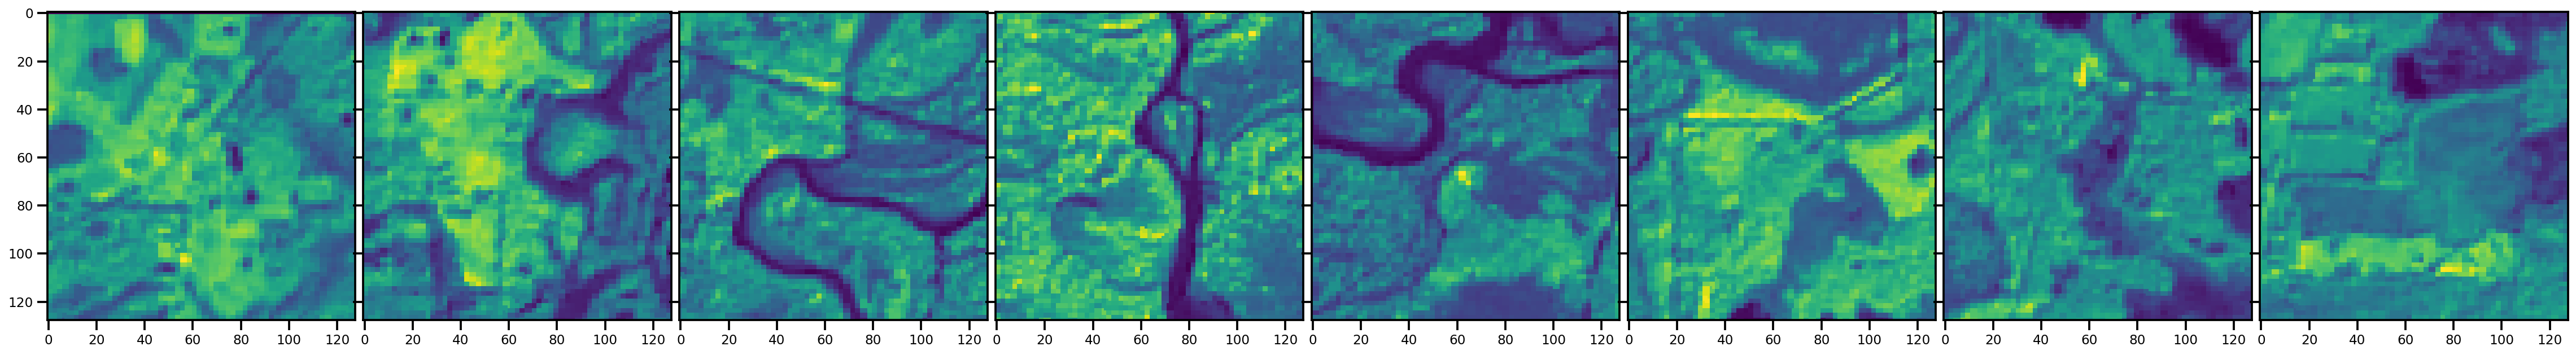

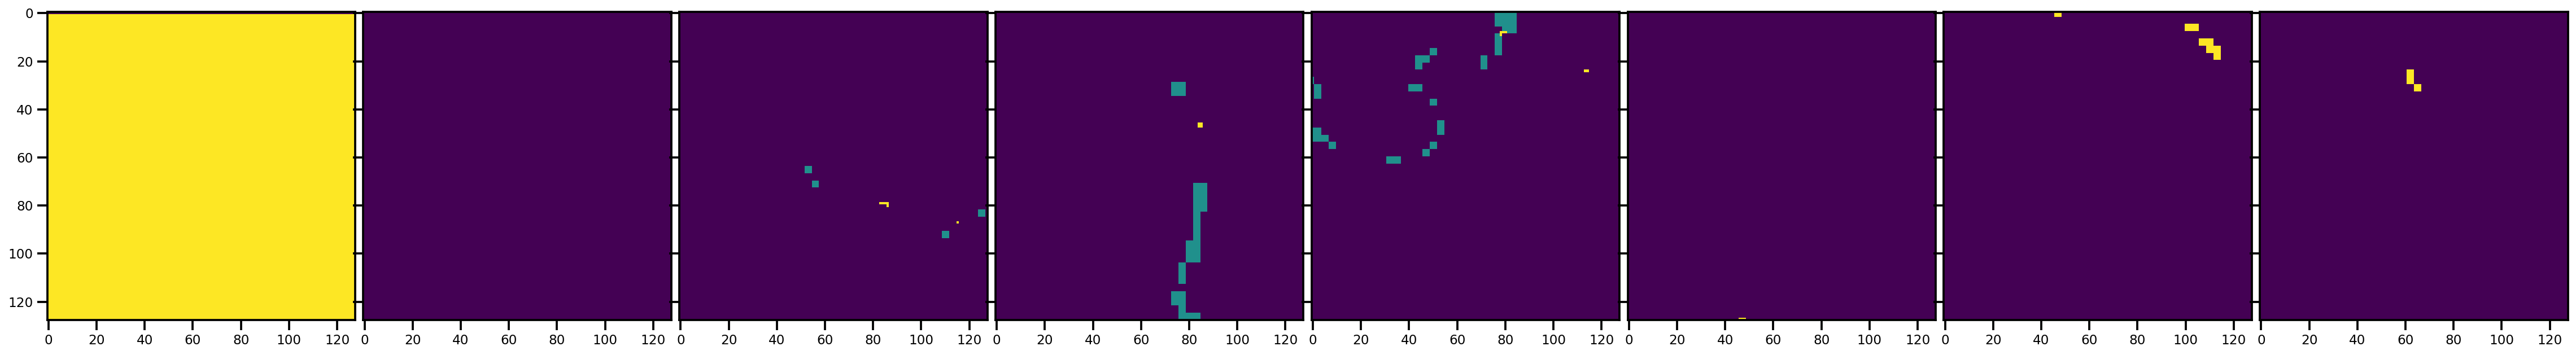

In [41]:
from rasterio.plot import show as rasterio_show
from mpl_toolkits.axes_grid1 import ImageGrid

n_tiles = 16
n_rows = 2
tiles_per_row = int(n_tiles / n_rows)
iteration = 0

# plot preamble
fig = plt.figure(figsize=(40, 20))
grid = ImageGrid(
    fig, 111,
    nrows_ncols=(1, tiles_per_row),
    axes_pad=0.1,
)




# BANDS
bands = [6,] #CHANNELS_CONFIGURATIONS["all"]

for iax, itile in zip(grid, range(n_tiles)):
    
    tile_data = train_dataset_tilded[itile]
#     print(tile_data["image"].shape, tile_data["mask"].shape)
#     print()
#     if itile < 8:
    iax.imshow(tile_data["image"][6,:,:].squeeze())
#         rasterio_show(tile_data["image"][6,:,:], ax=iax, cmap="pink")
#     else:
# #         rasterio_show(tile_data["mask"], ax=iax, cmap="pink")
#         iax.imshow(tile_data["mask"][0,:,:].squeeze())
plt.show()
    
n_tiles = 16
n_rows = 2
tiles_per_row = int(n_tiles / n_rows)
iteration = 0

# plot preamble
fig = plt.figure(figsize=(40, 20))
grid = ImageGrid(
    fig, 111,
    nrows_ncols=(1, tiles_per_row),
    axes_pad=0.1,
)




# BANDS
bands = [6,] #CHANNELS_CONFIGURATIONS["all"]

for iax, itile in zip(grid, range(n_tiles)):
    
    tile_data = train_dataset_tilded[itile]
#     print(tile_data["image"].shape, tile_data["mask"].shape)
    iax.imshow(tile_data["mask"][0,:,:].squeeze())
#  
plt.show()

### Demo